In [2]:
import pandas as pd
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleaned_vac_data.csv")
df.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,day,month,year
0,AFG,Asia,Afghanistan,03/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,41128772,3,1,2020
1,AFG,Asia,Afghanistan,14/05/2022,0.0,0.0,0.0,0.0,5205.0,0.0,0.0,0.0,127.0,4779.0,0.012,41128772,14,5,2022
2,AFG,Asia,Afghanistan,13/05/2022,0.0,0.0,0.0,0.0,4246.0,0.0,0.0,0.0,103.0,3909.0,0.010,41128772,13,5,2022
3,AFG,Asia,Afghanistan,12/05/2022,0.0,0.0,0.0,0.0,3287.0,0.0,0.0,0.0,80.0,3038.0,0.007,41128772,12,5,2022
4,AFG,Asia,Afghanistan,11/05/2022,0.0,0.0,0.0,0.0,2865.0,0.0,0.0,0.0,70.0,2639.0,0.006,41128772,11,5,2022


CLEANING LOCATION

In [15]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswat

In [17]:
df.location = df.location.replace().replace({
    "Czechia": "Czech Republic", 
    "United States": "USA", 
    "United Kingdom": "UK", 
    "Isle of Man": "Isle Of Man",
    "Northern Cyprus" : "Cyprus"
})

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_99098/3062164297.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.location = df.location.replace().replace({


In [18]:
# the uk is made up of England, Scotland, Wales and Northern Ireland
df = df[df.location.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

Exploratory Analysis and Visualization

In [23]:
df.describe()
# df.info() #Index: 305155 entries, 0 to 309966
# df.shape #(305155, 19)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,day,month,year
count,3.051550e+05,3.051550e+05,3.051550e+05,3.051550e+05,3.051550e+05,305155.000000,305155.000000,305155.000000,305155.000000,3.051550e+05,305155.000000,3.051550e+05,305155.000000,305155.000000,305155.000000
mean,1.768064e+07,5.868364e+06,4.981201e+06,3.500338e+04,4.410381e+04,23.409543,9.935728,8.492785,1067.876073,1.631633e+04,0.043573,3.364245e+07,15.650735,6.112697,2021.302227
std,1.627693e+08,5.114689e+07,4.521095e+07,4.269767e+05,4.186747e+05,60.140773,24.193338,22.003146,2602.353441,1.555031e+05,0.142540,1.356360e+08,8.791351,3.406360,1.035706
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.700000e+01,1.000000,1.000000,2020.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.828360e+05,8.000000,3.000000,2020.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,5.489744e+06,16.000000,6.000000,2021.000000
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.013000e+03,0.000000,0.000000,0.000000,866.000000,9.750000e+02,0.021000,2.212524e+07,23.000000,9.000000,2022.000000
max,3.491077e+09,1.310292e+09,1.276760e+09,2.474100e+07,2.242429e+07,406.430000,129.070000,126.890000,117113.000000,6.785334e+06,11.711000,1.425887e+09,31.000000,12.000000,2023.000000


/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_99098/1444068271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

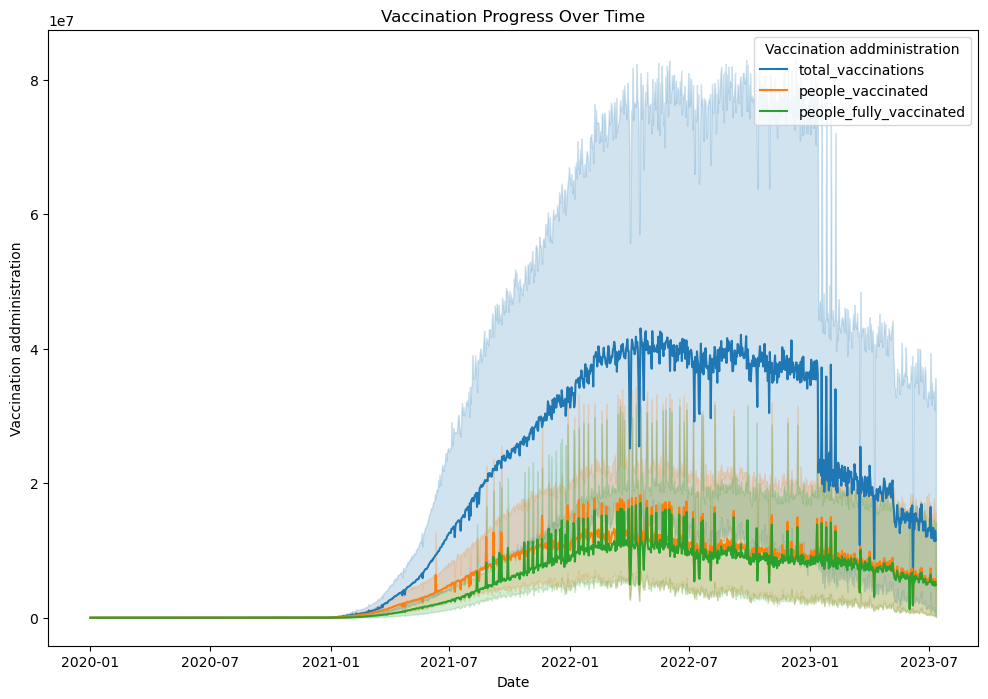

In [27]:
# Explore the vaccination dynamic 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated'
# Convert the 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

"""
#pd.melt(): This function is used to reshape or unpivot the DataFrame. It converts wide-format data (with multiple columns) into long-format data.
# id_vars=['date', 'location']: These are the columns that you want to keep as identifier variables (unchanged) during the melting process. 
# In this case, 'date' and 'location' will remain as they are. 
"""


# Reshape the DataFrame using pd.melt
melted_df = pd.melt(df, id_vars=['date', 'location'], value_vars=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'],
                    var_name='Vaccinations' , value_name='Vaccination addministration')

# Create a line plot using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='Vaccination addministration', hue='Vaccinations', data=melted_df)

# Format the plot
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccination addministration')
plt.legend(title='Vaccination addministration')
plt.show()